# Exploring notebook

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys



# makes plots nice
def make_pretty(ax, title='', x_label='', y_label='', img=False):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if img:
        ax.axis('off')
    return ax

pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)


data_path = os.path.join('nice_combined_data.csv')

In [25]:
df = pd.read_csv(data_path)
df.shape

(6567, 10)

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,mentioned,text,mentioned_count,upvote_ratio,score,gilded,total_awards_received,num_comments,target
0,2021-01-04,AAPL,weekend iv report ticker low iv cheap premium ...,14,0.763571,189.357143,0.428571,5.214286,94.357143,-0.030782
1,2021-01-04,BA,weekend iv report ticker low iv cheap premium ...,5,0.782000,131.000000,0.000000,0.200000,32.800000,-0.034667
2,2021-01-04,BABA,weekend iv report ticker low iv cheap premium ...,8,0.728750,45.250000,0.000000,0.125000,20.750000,0.005960
3,2021-01-04,BB,guess company due diligence without revealing ...,1,0.960000,417.000000,1.000000,2.000000,51.000000,-0.017910
4,2021-01-04,CMCSA,lesson 2020 x200bhi debated make post thought ...,1,0.920000,304.000000,0.000000,0.000000,61.000000,-0.033856


In [27]:
df['target_bin'] = df['target'].apply(lambda x : 1 if x > 0 else 0)

In [28]:
df.head()

,Date,mentioned,text,mentioned_count,upvote_ratio,score,gilded,total_awards_received,num_comments,target,target_bin
0,2021-01-04,AAPL,weekend iv report ticker low iv cheap premium ...,14,0.763571,189.357143,0.428571,5.214286,94.357143,-0.030782,0
1,2021-01-04,BA,weekend iv report ticker low iv cheap premium ...,5,0.782000,131.000000,0.000000,0.200000,32.800000,-0.034667,0
2,2021-01-04,BABA,weekend iv report ticker low iv cheap premium ...,8,0.728750,45.250000,0.000000,0.125000,20.750000,0.005960,1
3,2021-01-04,BB,guess company due diligence without revealing ...,1,0.960000,417.000000,1.000000,2.000000,51.000000,-0.017910,0
4,2021-01-04,CMCSA,lesson 2020 x200bhi debated make post thought ...,1,0.920000,304.000000,0.000000,0.000000,61.000000,-0.033856,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   6567 non-null   datetime64[ns]
 1   mentioned              6567 non-null   object        
 2   text                   6567 non-null   object        
 3   mentioned_count        6567 non-null   int64         
 4   upvote_ratio           6567 non-null   float64       
 5   score                  6567 non-null   float64       
 6   gilded                 6567 non-null   float64       
 7   total_awards_received  6567 non-null   float64       
 8   num_comments           6567 non-null   float64       
 9   target                 6567 non-null   float64       
 10  target_bin             6567 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 564.5+ KB


In [30]:
df = df[df['mentioned_count'] >= 3]
df.shape

(4370, 11)

(3973, 11)
Max:  3523
Min:  3


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

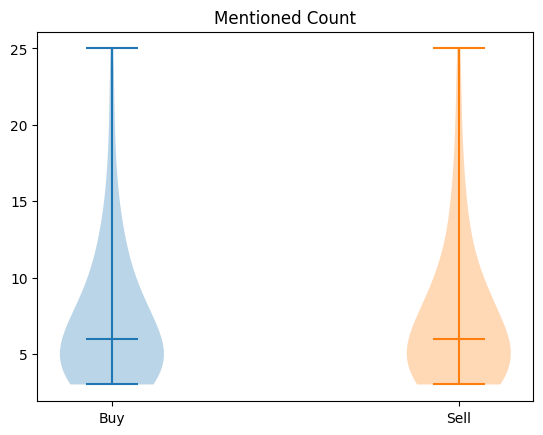

In [31]:
fig, ax = plt.subplots()
mc = df[df['mentioned_count'] <= 25]
print(mc.shape)
print('Max: ', df['mentioned_count'].max())
print('Min: ', df['mentioned_count'].min())
ax.violinplot(mc['mentioned_count'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['mentioned_count'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Mentioned Count')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

Excluding outliers here so the plots can be usable (excluding about 400 records)


Max:  1.0
Min:  0.3999999999999999


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

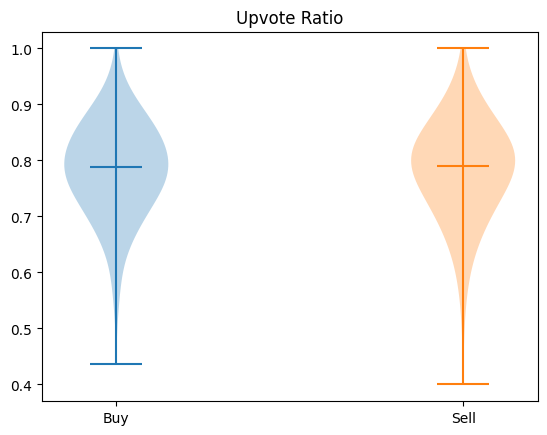

In [32]:
fig, ax = plt.subplots()
print('Max: ', df['upvote_ratio'].max())
print('Min: ', df['upvote_ratio'].min())
ax.violinplot(df['upvote_ratio'][df['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(df['upvote_ratio'][df['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Upvote Ratio')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

(3964, 11)
Max:  16102.2
Min:  0.3333333333333333


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

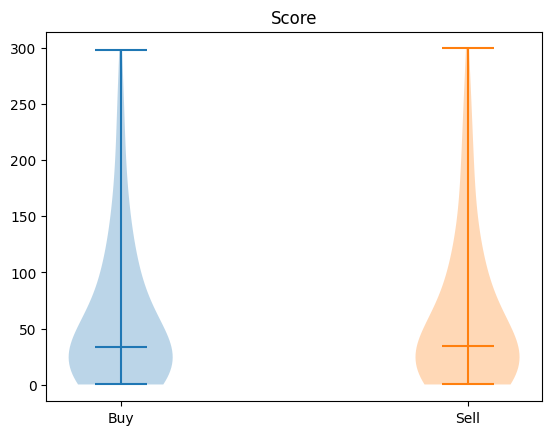

In [33]:
fig, ax = plt.subplots()
mc = df[df['score'] <= 300]
print(mc.shape)
print('Max: ', df['score'].max())
print('Min: ', df['score'].min())
ax.violinplot(mc['score'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['score'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Score')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

ABout 400 records excluded again

Gilded less than 1

(4349, 11)
Max:  13.5
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

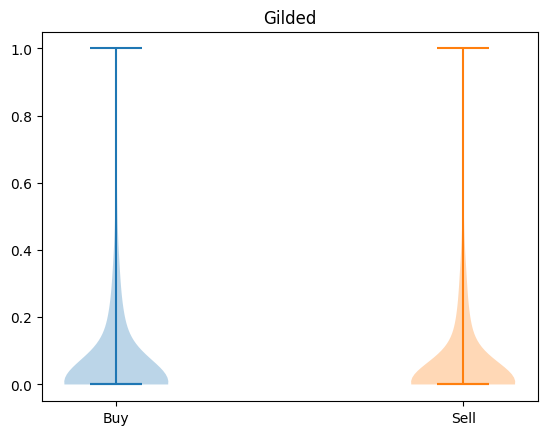

In [34]:
fig, ax = plt.subplots()
mc = df[df['gilded'] <= 1]
print(mc.shape)
print('Max: ', df['gilded'].max())
print('Min: ', df['gilded'].min())
ax.violinplot(mc['gilded'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['gilded'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Gilded')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

Gilded other side (greater than 1 gilded)

(30, 11)
Max:  13.5
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

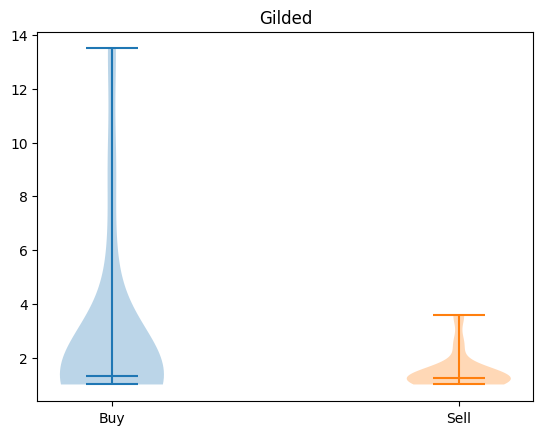

In [35]:
fig, ax = plt.subplots()
mc = df[df['gilded'] >= 1]
print(mc.shape)
print('Max: ', df['gilded'].max())
print('Min: ', df['gilded'].min())
ax.violinplot(mc['gilded'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['gilded'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Gilded')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

The above graph is only 30 samples!!!!!!

(4250, 11)
Max:  324.3
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

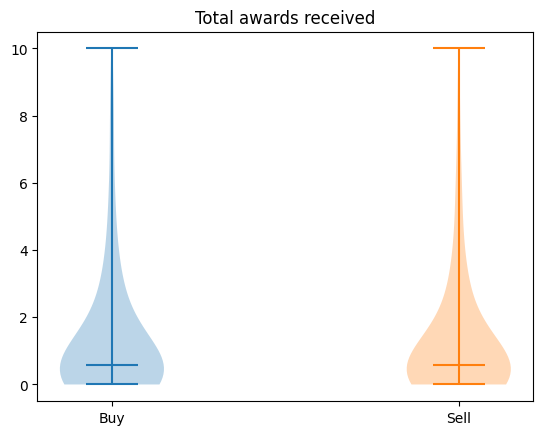

In [36]:
fig, ax = plt.subplots()
mc = df[df['total_awards_received'] <= 10]
print(mc.shape)
print('Max: ', df['total_awards_received'].max())
print('Min: ', df['total_awards_received'].min())
ax.violinplot(mc['total_awards_received'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['total_awards_received'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Total awards received')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

(4266, 11)
Max:  2811.3888888888887
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

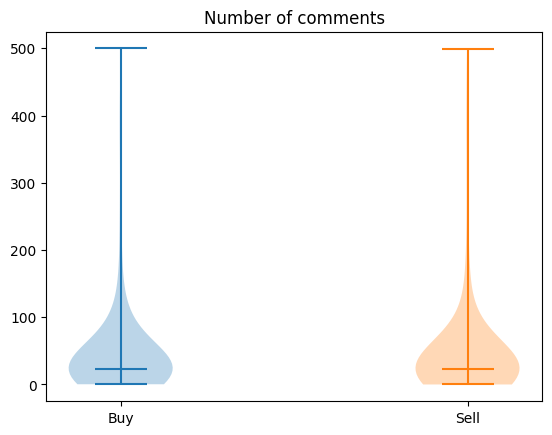

In [37]:
fig, ax = plt.subplots()
mc = df[df['num_comments'] <= 500]
print(mc.shape)
print('Max: ', df['num_comments'].max())
print('Min: ', df['num_comments'].min())
ax.violinplot(mc['num_comments'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['num_comments'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Number of comments')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

In [38]:
df['target_bin'].value_counts()

0    2255
1    2115
Name: target_bin, dtype: int64

Pretty balanced dataset... Nice

Min of score: 0.3333333333333333
Max of score: 498.0


(4183, 11)

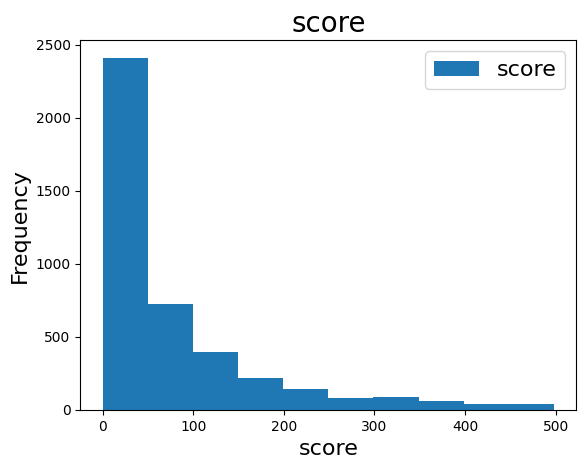

In [39]:
def make_hist(ax, col, df):
    print(f'Min of {col}: {df[col].min()}')
    print(f'Max of {col}: {df[col].max()}')
    ax = df[col].plot(kind='hist', ax=ax)
    make_pretty(ax, f'{col}', col, 'Frequency')
    
fig, ax = plt.subplots()
mc = df[df['score'] <= 500]
make_hist(ax, 'score', mc)
mc.shape
    

Min of mentioned_count: 3
Max of mentioned_count: 20


(3877, 11)

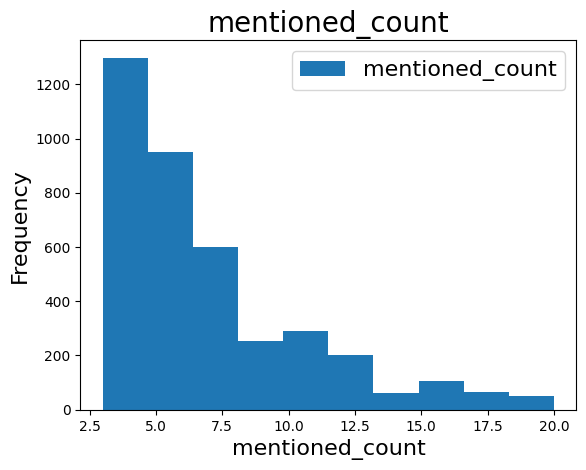

In [40]:
fig, ax = plt.subplots()
mc = df[df['mentioned_count'] <= 20]
make_hist(ax, 'mentioned_count', mc)
mc.shape

Min of upvote_ratio: 0.3999999999999999
Max of upvote_ratio: 1.0


(4370, 11)

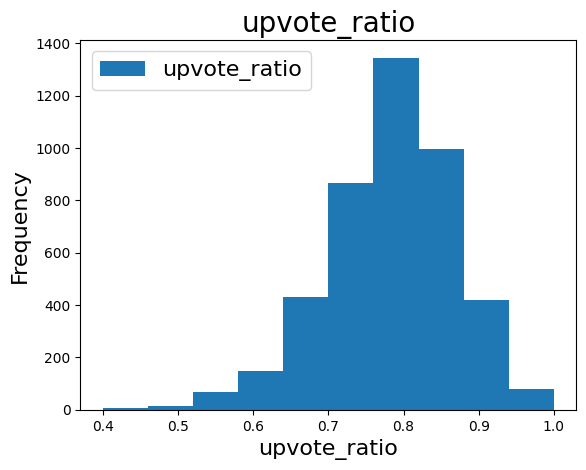

In [41]:
fig, ax = plt.subplots()

make_hist(ax, 'upvote_ratio', df)
df.shape

Min of gilded: 0.0
Max of gilded: 1.0


(4349, 11)

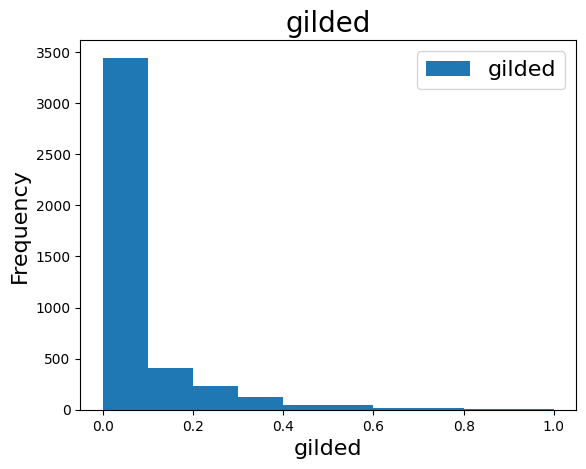

In [42]:
fig, ax = plt.subplots()
mc = df[df['gilded'] <= 1]
make_hist(ax, 'gilded', mc)
mc.shape

Min of total_awards_received: 0.0
Max of total_awards_received: 9.875


(4246, 11)

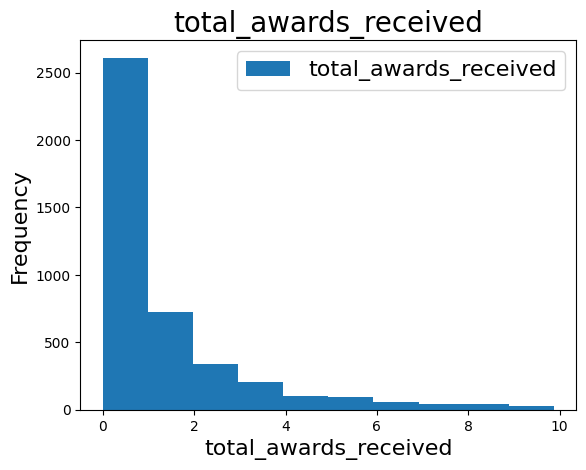

In [43]:
fig, ax = plt.subplots()
mc = df[df['total_awards_received'] < 10]
make_hist(ax, 'total_awards_received', mc)
mc.shape

Min of num_comments: 0.0
Max of num_comments: 198.85


(4085, 11)

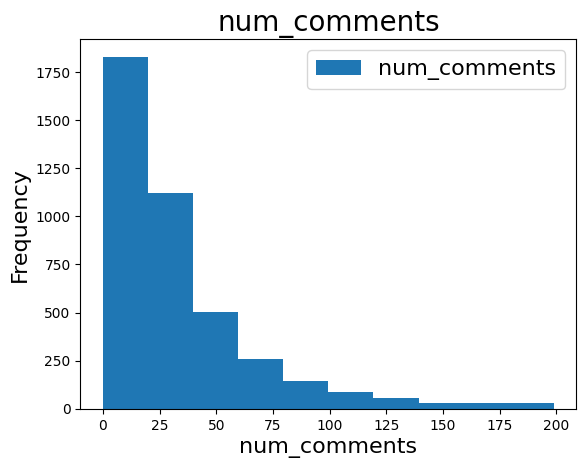

In [44]:
fig, ax = plt.subplots()
mc = df[df['num_comments'] < 200]
make_hist(ax, 'num_comments', mc)
mc.shape

In [45]:
df.corr()

C:\Users\paganinik\AppData\Local\Temp\ipykernel_20516\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mentioned_count,upvote_ratio,score,gilded,total_awards_received,num_comments,target,target_bin
mentioned_count,1.000000,0.046474,0.045392,0.003779,0.018094,0.119975,-0.120700,-0.029882
upvote_ratio,0.046474,1.000000,0.104935,0.045610,0.071663,0.084750,-0.005177,0.005692
score,0.045392,0.104935,1.000000,0.729753,0.872348,0.339538,-0.013630,0.009384
gilded,0.003779,0.045610,0.729753,1.000000,0.900643,0.254712,0.004175,0.029133
total_awards_received,0.018094,0.071663,0.872348,0.900643,1.000000,0.320108,0.002416,0.022577
num_comments,0.119975,0.084750,0.339538,0.254712,0.320108,1.000000,0.089419,0.001858
target,-0.120700,-0.005177,-0.013630,0.004175,0.002416,0.089419,1.000000,0.425144
target_bin,-0.029882,0.005692,0.009384,0.029133,0.022577,0.001858,0.425144,1.000000


### Feature Engineering - Sentiment Analysis

https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

(Takes 10 minutes to run beware)

In [47]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from tqdm import tqdm
tqdm.pandas()
nltk.download('vader_lexicon')


analyzer = SentimentIntensityAnalyzer()

df['polarity'] = df['text'].progress_apply(lambda x : analyzer.polarity_scores(x))
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\paganinik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████| 4370/4370 [10:34<00:00,  6.89it/s]  


### Sentiment feature analysis

Min of neg: 0.0
Max of neg: 0.209


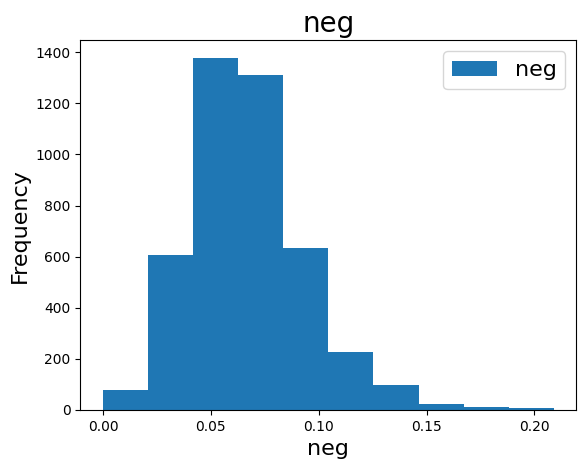

In [48]:
fig, ax = plt.subplots()
make_hist(ax, 'neg', df)


Min of pos: 0.0
Max of pos: 0.359


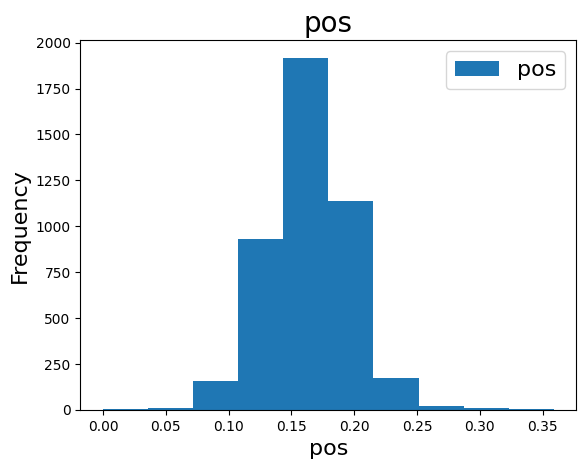

In [49]:
fig, ax = plt.subplots()
make_hist(ax, 'pos', df)

Min of neu: 0.575
Max of neu: 0.997


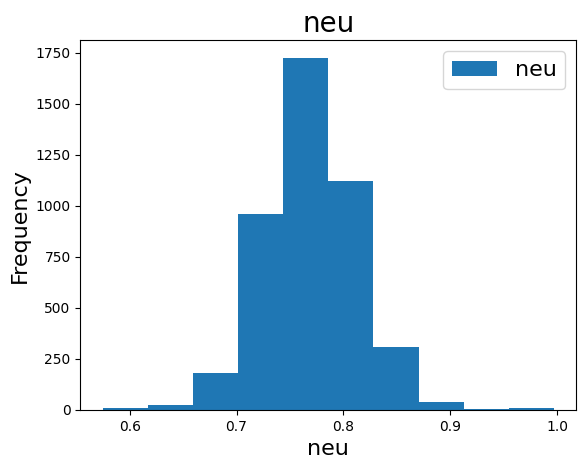

In [50]:
fig, ax = plt.subplots()
make_hist(ax, 'neu', df)

Max:  0.359
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

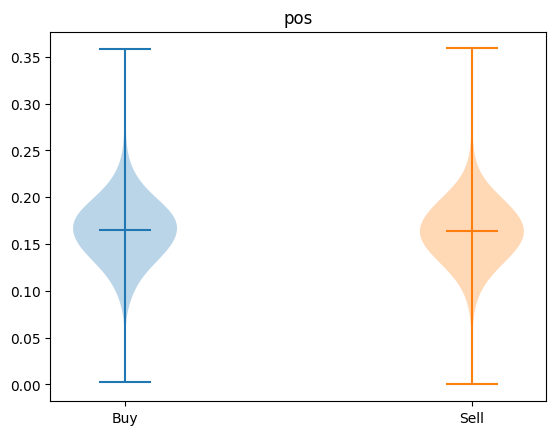

In [52]:
fig, ax = plt.subplots()
col_name = 'pos'


print('Max: ', df[col_name].max())
print('Min: ', df[col_name].min())
ax.violinplot(df[col_name][df['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(df[col_name][df['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title(col_name)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

Max:  0.209
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

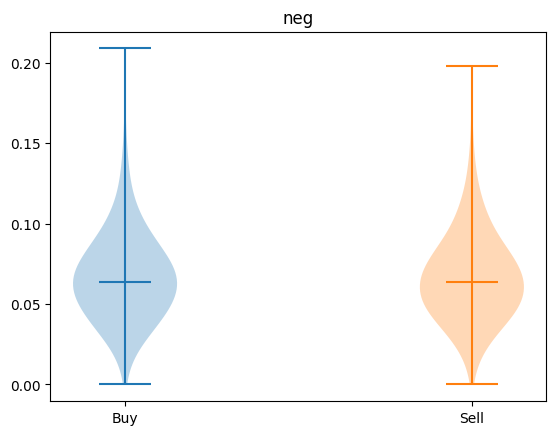

In [55]:
fig, ax = plt.subplots()
col_name = 'neg'


print('Max: ', df[col_name].max())
print('Min: ', df[col_name].min())
ax.violinplot(df[col_name][df['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(df[col_name][df['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title(col_name)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

Max:  0.997
Min:  0.575


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

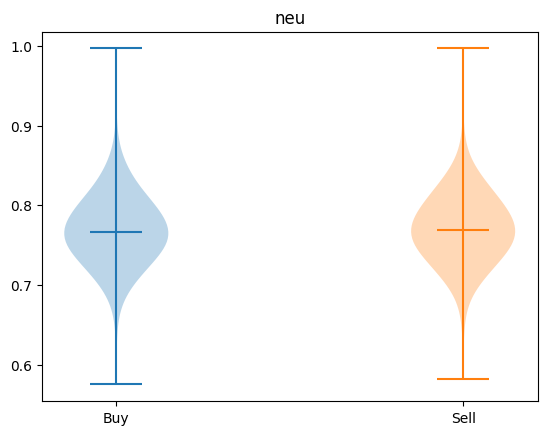

In [56]:
fig, ax = plt.subplots()
col_name = 'neu'


print('Max: ', df[col_name].max())
print('Min: ', df[col_name].min())
ax.violinplot(df[col_name][df['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(df[col_name][df['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title(col_name)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

### Maybe some statistical tests here for numerical features

In [ ]:
from scipy.stats import kruskal

cont_var = ['mentioned_count', 'upvote_ratio', 'score', 'gilded', 'total_awards_received', 'num_comments']

for x in cont_var:
    samples_by_group = []
    for y in set(df['target_bin']):
        mask = df['target_bin'] == y
        samples_by_group.append(df[x][mask]) 
    stat, p = kruskal(*samples_by_group, nan_policy='omit')
        
    


    print(f'{x} p: {p}')

### Some graphics for the text